<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week4_HW_tips_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [10]:
import seaborn as sns
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [6]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [7]:
tips.drop('Unnamed: 0', axis=1, inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Plot the total_bill column histogram

Text(0, 0.5, 'Frequency')

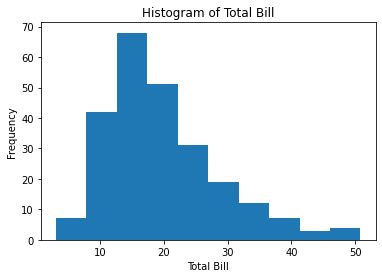

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(tips['total_bill'])  
ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

Text(0, 0.5, 'Tip')

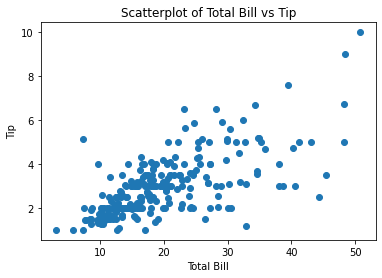

In [13]:
scatter_plot = plt.figure()
ax = scatter_plot.add_subplot(1,1,1)
ax.scatter(tips['total_bill'],tips['tip'])
ax.set_title('Scatterplot of Total Bill vs Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

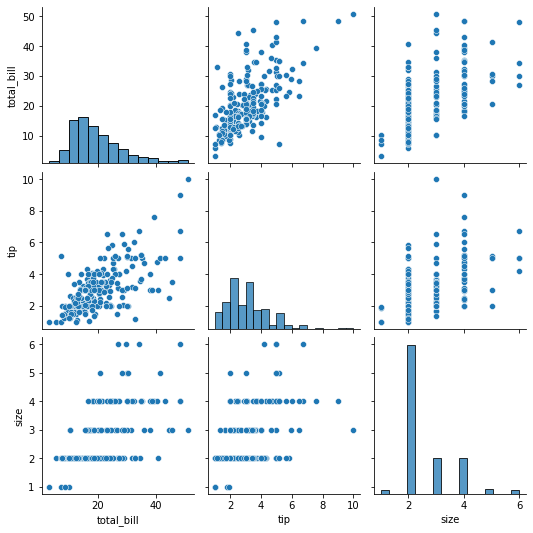

In [14]:
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

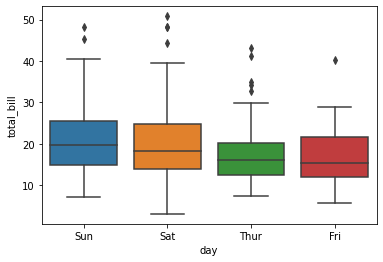

In [16]:
sns.boxplot(x="day", y="total_bill", data=tips)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

Text(0, 0.5, 'Tip')

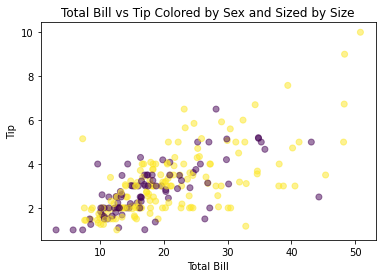

In [19]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
ax = scatter_plot.add_subplot(1,1,1)
ax.scatter(x = tips['total_bill'],
           y = tips['tip'],
           c = tips['sex_color'],
           alpha = 0.5)          
ax.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

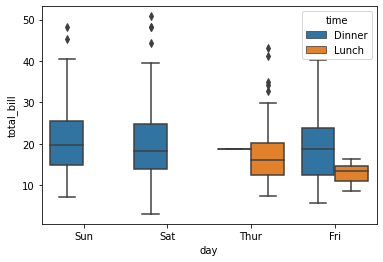

In [21]:
sns.boxplot(x="day", y="total_bill", hue = 'time', data=tips)

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


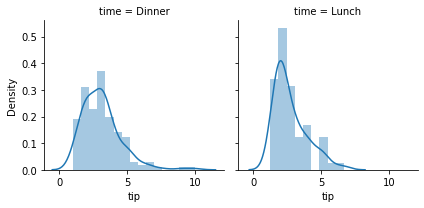

In [22]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'tip')

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

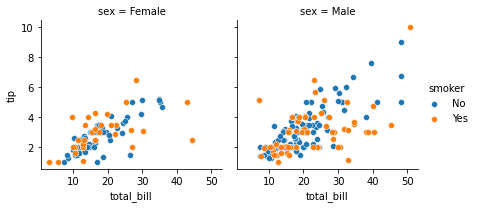

In [27]:
facet = sns.FacetGrid(tips, col='sex', hue ='smoker')
facet.map(sns.scatterplot, 'total_bill','tip')
facet = facet.add_legend()